# Issue 3

statistical summary of the dataset  
omniXAI: SHAP, look at other functions, correlation

Feature Analysis

In [1]:
import os
import pandas as pd
import numpy as np
from omnixai.data.tabular import Tabular
from omnixai.explainers.tabular import TabularExplainer
from omnixai.explainers.data import DataAnalyzer
import seaborn as sns
from omnixai.visualization.dashboard import Dashboard
import matplotlib.pyplot as plt

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_complete = pd.read_csv('../FeatureEngineering/train_complete.csv')

In [3]:
train_complete.shape

(260864, 43)

In [4]:
df = train_complete.fillna(-1)
df.head()

,user_id,merchant_id,label,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,...,user_seller_category_count,user_seller_brand_count,user_seller_Click_count,user_seller_Add_to_cart_count,user_seller_Purchase_count,user_seller_Add_to_favorite_count,user_seller_total_action,user_seller_active_days,brand_similarity_score,cat_similarity_score
0,34176,3906,0,1,0,0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,34176,121,0,1,0,0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,34176,4356,1,1,0,0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,34176,2217,0,1,0,0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,230784,4818,0,1,0,0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [5]:
print(list(train_complete.columns))

['user_id', 'merchant_id', 'label', 'user_gender_female', 'user_gender_male', 'user_gender_unknown', 'user_age_0_18', 'user_age_18_24', 'user_age_25_29', 'user_age_30_34', 'user_age_35_39', 'user_age_40_49', 'user_age_50_', 'user_age_unknown', 'user_active_days', 'user_total_action', 'user_Click_Count', 'user_Add_to_cart_count', 'user_purchase_count', 'user_Add_to_favorite_count', 'user_item_count', 'user_category_count', 'user_brand_count', 'seller_item_count', 'seller_category_count', 'seller_brand_count', 'seller_active_days', 'seller_total_action', 'seller_Click_Count', 'seller_Add_to_cart_count', 'seller_purchase_count', 'seller_Add_to_favorite_count', 'user_seller_item_count', 'user_seller_category_count', 'user_seller_brand_count', 'user_seller_Click_count', 'user_seller_Add_to_cart_count', 'user_seller_Purchase_count', 'user_seller_Add_to_favorite_count', 'user_seller_total_action', 'user_seller_active_days', 'brand_similarity_score', 'cat_similarity_score']


In [48]:
tabular_data = Tabular(
    df,
    feature_columns=list(train_complete.columns).remove('label'),
    target_column='label'
)

In [37]:
explainer = DataAnalyzer(
    explainers=["correlation", "imbalance#0","imbalance#1","imbalance#2", "mutual", "chi2"],
    mode="classification",
    data=tabular_data
)

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_discretization.py:209: FutureWarning:

In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_discretization.py:209: FutureWarning:

In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_discretization.py:209: FutureWarning:

In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.

c:\Users\Daniel\AppData\Local\Programs\P

In [38]:
label = list(df['label'])
dataset = df.drop('label', axis='columns')

explanations = explainer.explain_global(
    params={"imbalance#0": {"features": ["user_gender_female"]},
            "imbalance#1": {"features": ["seller_category_count"]},
            "imbalance#2": {"features": ["user_category_count"]},
            "correlation": {"features": list(dataset.columns)}
            }
)

Correlation:


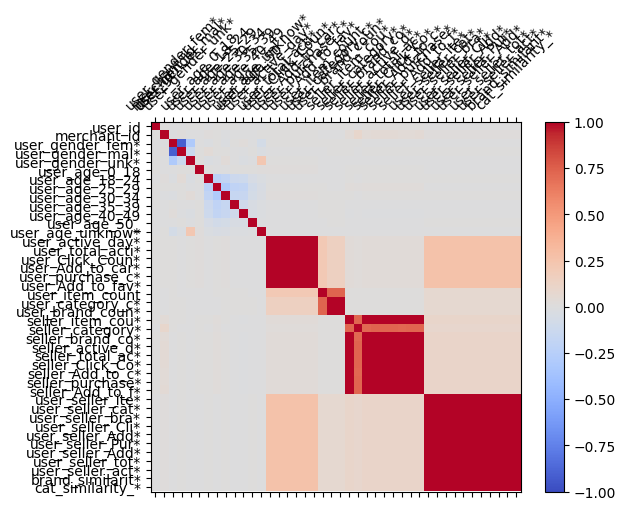

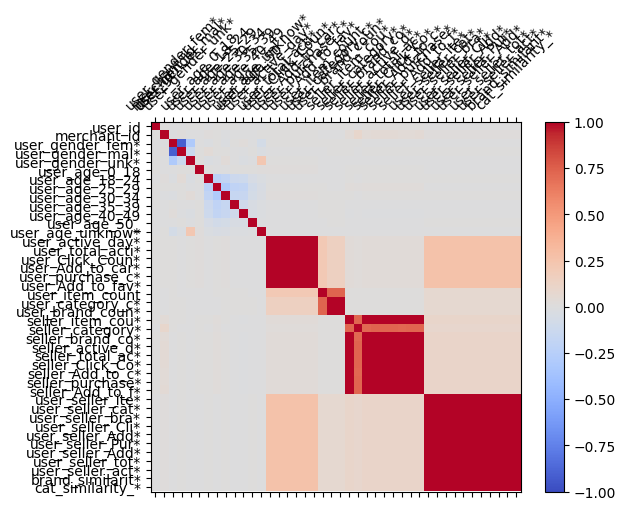

In [39]:
print("Correlation:")
explanations["correlation"].plot()


In [40]:
print("Imbalance#0:")
explanations["imbalance#0"].ipython_plot()

Imbalance#0:


In [41]:
print("Imbalance#1:")
explanations["imbalance#1"].ipython_plot()

Imbalance#1:


In [42]:
print("Imbalance#1:")
explanations["imbalance#2"].ipython_plot()

Imbalance#1:


Mutual:


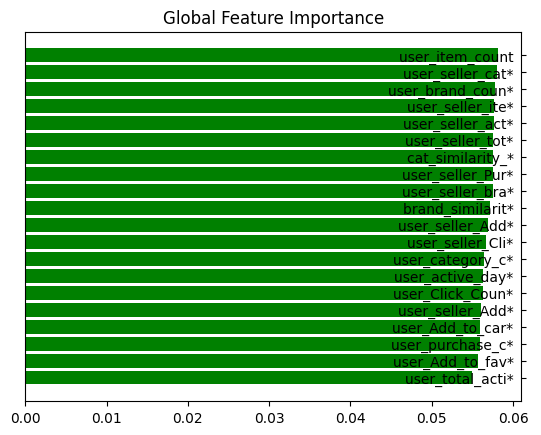

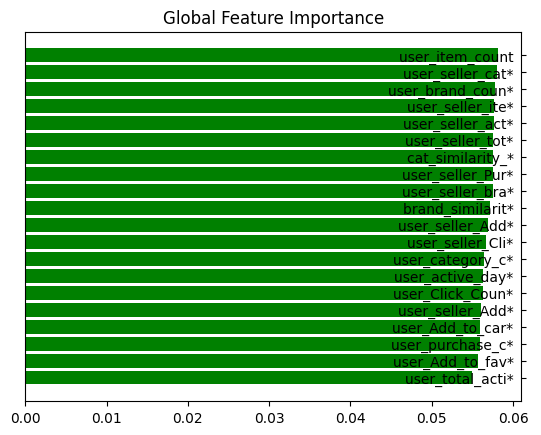

In [20]:
print("Mutual:")
explanations["mutual"].plot()

chi2:


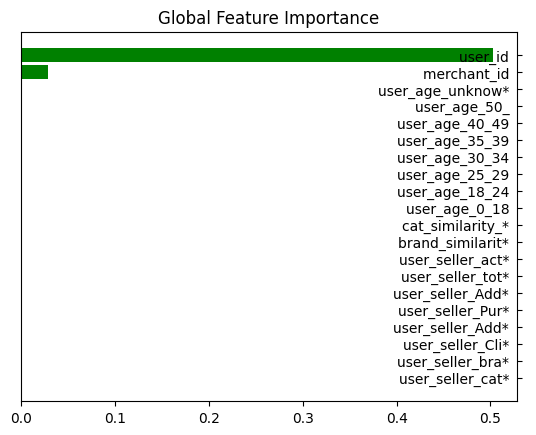

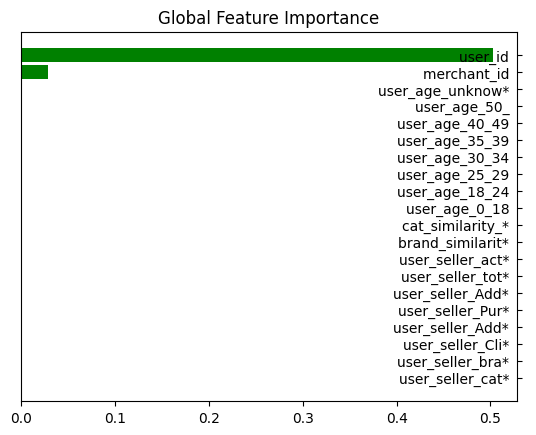

In [21]:
print("chi2:")
explanations["chi2"].plot()

Testing Pearson Coefficient  
  
High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.   
Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.   
Low degree: When the value lies below + . 29, then it is said to be a small correlation.

In [10]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['user_id'], df['merchant_id'])
print(corr)

0.0015270771518201287


In [11]:
df.corr()

,user_id,merchant_id,label,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,...,user_seller_category_count,user_seller_brand_count,user_seller_Click_count,user_seller_Add_to_cart_count,user_seller_Purchase_count,user_seller_Add_to_favorite_count,user_seller_total_action,user_seller_active_days,brand_similarity_score,cat_similarity_score
user_id,1.000000,0.001527,-0.001317,-0.000916,-0.000176,0.002562,0.001995,-0.005018,0.004116,0.004736,...,-0.002693,-0.002693,-0.001977,-0.002693,-0.001451,-0.002587,-0.001583,-0.002485,-0.003213,-0.001620
merchant_id,0.001527,1.000000,0.001175,-0.009003,0.009916,-0.001275,-0.003989,0.013206,0.002450,-0.009737,...,0.012678,0.012678,0.008896,0.012678,0.010761,0.011886,0.008307,0.011356,0.013297,0.008116
label,-0.001317,0.001175,1.000000,0.020487,-0.019228,-0.004676,-0.001499,-0.013384,-0.003039,0.009349,...,0.003562,0.003562,0.002041,0.003562,0.001575,0.003875,0.001604,0.003948,0.002497,0.002491
user_gender_female,-0.000916,-0.009003,0.020487,1.000000,-0.907443,-0.298827,-0.001167,-0.020469,0.000017,-0.020215,...,-0.005889,-0.005889,-0.005779,-0.005889,-0.005816,-0.006089,-0.005734,-0.006024,-0.007677,-0.005367
user_gender_male,-0.000176,0.009916,-0.019228,-0.907443,1.000000,-0.129809,0.000660,0.034537,0.005282,0.007717,...,0.007098,0.007098,0.007213,0.007098,0.007199,0.007365,0.007198,0.007337,0.009088,0.006805
user_gender_unknown,0.002562,-0.001275,-0.004676,-0.298827,-0.129809,1.000000,0.001254,-0.030137,-0.012036,0.030177,...,-0.002225,-0.002225,-0.002745,-0.002225,-0.002626,-0.002359,-0.002817,-0.002449,-0.002526,-0.002791
user_age_0_18,0.001995,-0.003989,-0.001499,-0.001167,0.000660,0.001254,1.000000,0.000829,-0.001299,-0.000425,...,-0.000150,-0.000150,-0.000128,-0.000150,-0.000141,-0.000144,-0.000124,-0.000143,-0.000093,-0.000125
user_age_18_24,-0.005018,0.013206,-0.013384,-0.020469,0.034537,-0.030137,0.000829,1.000000,-0.221950,-0.182483,...,0.003514,0.003514,0.002710,0.003514,0.003139,0.003331,0.002579,0.002779,0.002126,0.002321
user_age_25_29,0.004116,0.002450,-0.003039,0.000017,0.005282,-0.012036,-0.001299,-0.221950,1.000000,-0.295195,...,-0.001931,-0.001931,-0.002516,-0.001931,-0.002075,-0.001866,-0.002443,-0.001802,-0.000675,-0.002360
user_age_30_34,0.004736,-0.009737,0.009349,-0.020215,0.007717,0.030177,-0.000425,-0.182483,-0.295195,1.000000,...,0.000374,0.000374,0.000757,0.000374,0.000686,-0.000189,0.000649,0.000609,-0.001238,0.000450


<AxesSubplot:>

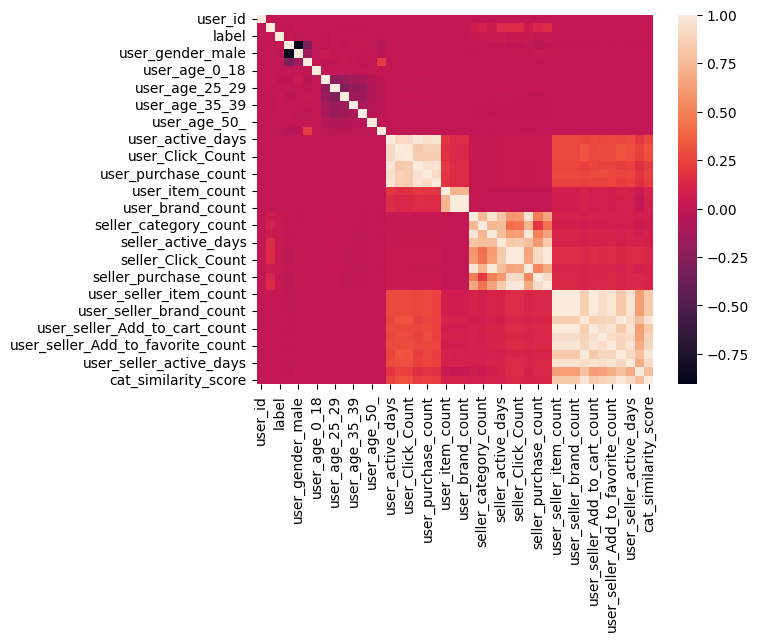

In [12]:
sns.heatmap(df.corr())

Need ML model for SHAP?

In [45]:
import xgboost
from omnixai.preprocessing.tabular import TabularTransform
import sklearn

In [8]:
label = list(df['label'])
dataset = df.drop('label', axis='columns')


In [9]:
dataset.shape

(260864, 42)

In [73]:
tabular_data2 = Tabular(
    dataset,
    feature_columns=list(train_complete.columns).remove('label'),
)

transformer = TabularTransform().fit(tabular_data2)
x = transformer.transform(tabular_data2)

gbtree = xgboost.XGBClassifier(n_estimators=300, max_depth=5)
gbtree.fit(x, label)

train_data = transformer.invert(x)

In [74]:
print(tabular_data2.shape)
print(train_data.shape)

(260864, 42)
(260864, 42)


In [76]:
explainer = TabularExplainer(
  explainers=["lime", "shap", "mace", "pdp", "ale"], # The explainers to apply
  mode="classification",                             # The task type
  data=train_data,                                   # The data for initializing the explainers                                            
  model=gbtree
)

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:925: UserWarning:

Unknown data type: <class 'omnixai.data.tabular.Tabular'>, trying to convert it to csr_matrix



Provided model function fails when applied to the provided data set.


c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\_compressed.py:80: VisibleDeprecationWarning:

Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.



TypeError: Explainer shap -- Not supported type for data.<class 'omnixai.data.tabular.Tabular'>